## **Data Mining Project**  
>Александар Китановски (186008)  
>Виктор Јовев (186068)


Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

1. Description of the data (with the calculation of basic statistics);
2. Research of dependencies and formulation of hypotheses;
3. Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships;
4. Comparison of the quality of the obtained models.

1. customerID - customer id
2. gender - client gender (male / female)
3. SeniorCitizen - is the client retired (1, 0)
4. Partner - is the client married (Yes, No)
5. tenure - how many months a person has been a client of the company
6. PhoneService - is the telephone service connected (Yes, No)
7. MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
8. InternetService - client's Internet service provider (DSL, Fiber optic, No)
9. OnlineSecurity - is the online security service connected (Yes, No, No internet service)
10. OnlineBackup - is the online backup service activated (Yes, No, No internet service)
11. DeviceProtection - does the client have equipment insurance (Yes, No, No 12. internet service)
13. TechSupport - is the technical support service connected (Yes, No, No internet service)
14. StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
15. StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
16. Contract - type of customer contract (Month-to-month, One year, Two year)
17. PaperlessBilling - whether the client uses paperless billing (Yes, No)
18. PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges - current monthly payment
20. TotalCharges - the total amount that the client paid for the services for the entire time
21. Churn - whether there was a churn (Yes or No)

# **Libraries**

In [64]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# !pip install missingno
#!pip install pomegranate
#!apt install libgraphviz-dev
#!pip install pygraphviz
# !pip uninstall numpy
# !pip install numpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [65]:
import pandas as pd
#import pandas_profiling
#from pandas_profiling import ProfileReport
import numpy as np

import sklearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate, learning_curve, RandomizedSearchCV, cross_val_predict, GridSearchCV, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve, roc_auc_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge, LogisticRegressionCV, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import scipy.stats as stats

from pomegranate import BayesianNetwork

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
% matplotlib inline

from itertools import combinations

from scipy.stats import chi2_contingency

# **Loading Dataset**

In [3]:
real_dataset= pd.read_csv("/content/dataset.csv")

In [4]:
real_dataset.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


# **Exploratory Data Analysis**

In [5]:
dataset = real_dataset.drop(columns=['customerID','Unnamed: 0']) 

In [6]:
dataset.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
5,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
6,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.60,No
7,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.90,No
8,Male,0,No,No,39,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [7]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

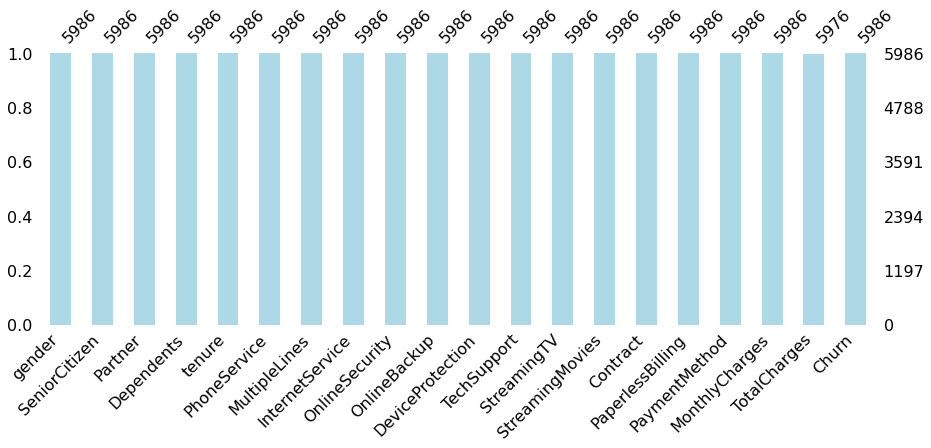

In [8]:
msno.bar(dataset,color='lightblue',figsize=(15,5)) #check missing values
#There are few missing values in TotalCharges column

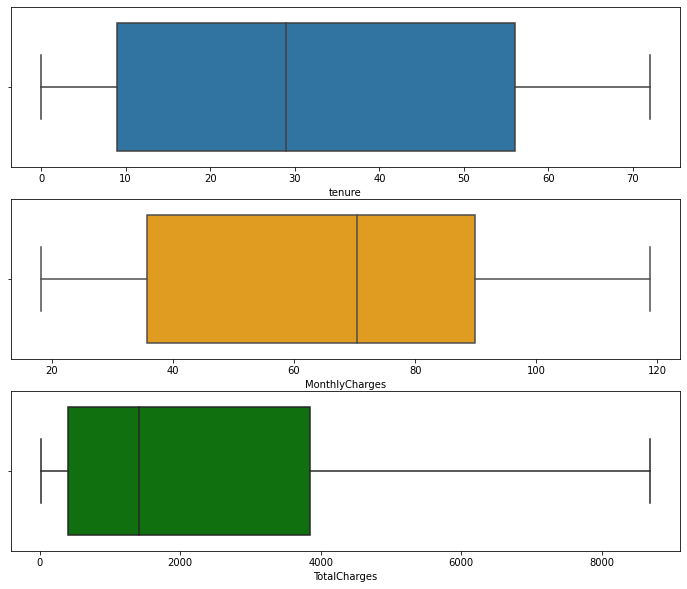

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,10))
sns.boxplot(x='tenure',data=dataset,ax=axes[0])
sns.boxplot(x='MonthlyCharges',data=dataset,ax=axes[1], color='orange')
sns.boxplot(x='TotalCharges',data=dataset,ax=axes[2], color='green')
plt.show()
#No outliers

In [10]:
print("Total Number:")
print(dataset['gender'].value_counts(),"\n")

Total Number:
Male      3050
Female    2936
Name: gender, dtype: int64 



In [11]:
partners = {'Male':0, 'Female':0}
for row in range(len(dataset)):
  if dataset.iloc[row]['Partner'] == 'Yes':
       partners[dataset.iloc[row]['gender']]+=1

print("Married customers:")
print(partners,"\n")
#How many males and females are already married?

Married customers:
{'Male': 1468, 'Female': 1436} 



In [12]:
retired_citizens = {'Male':0, 'Female':0}
for row in range(len(dataset)):
  if dataset.iloc[row]['SeniorCitizen'] == 1:
       retired_citizens[dataset.iloc[row]['gender']]+=1

print("Retired citizens:")
print(retired_citizens,"\n")
#How many males and females are already retired?

Retired citizens:
{'Male': 484, 'Female': 482} 



In [13]:
citizens_avg = dataset.groupby("SeniorCitizen").MonthlyCharges.mean()
print(citizens_avg)

total_avg = dataset.MonthlyCharges.mean()
print(f"\nTotal average: {total_avg}")

SeniorCitizen
0    61.904273
1    79.861905
Name: MonthlyCharges, dtype: float64

Total average: 64.8022134981624


In [14]:
average_by_contract = dataset.groupby("Contract").MonthlyCharges.mean()
print(average_by_contract)
print("\n")

contract_types = dataset.Contract.value_counts()
print(contract_types)

Contract
Month-to-month    66.305782
One year          65.148589
Two year          61.084559
Name: MonthlyCharges, dtype: float64


Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64


In [15]:
CrosstabResult=pd.crosstab(index=dataset['InternetService'],columns=dataset['OnlineSecurity'])
print(CrosstabResult)

ChiSqResult = chi2_contingency(CrosstabResult)
print("\nThe P-Value of the ChiSq Test is: ",ChiSqResult[1])

# H0: InternetService and OnlineSecurity are independent variables
# if p-value > 0.05 then we don't reject our assumption
# Since p-value is 0.0 then we reject our assumption, they aren't independent variables

OnlineSecurity     No  No internet service  Yes
InternetService                                
DSL              1072                    0  996
Fiber optic      1910                    0  717
No                  0                 1291    0

The P-Value of the ChiSq Test is:  0.0


We can conclude that features:  
**-OnlineSecurity	
-OnlineBackup	
-DeviceProtection	
-TechSupport	
-StreamingTV	
-StreamingMovies**  
and **InternetService** are dependent fully with same p-value =0.0

In [16]:
CrosstabResult=pd.crosstab(index=dataset['InternetService'],columns=dataset['Contract'])
print(CrosstabResult)

ChiSqResult = chi2_contingency(CrosstabResult)
print("\nThe P-Value of the ChiSq Test is: ",ChiSqResult[1])

# p-value is not greater than 0.05, so we reject our assumption. Since, InternetService and Contract aren't independent features.

Contract         Month-to-month  One year  Two year
InternetService                                    
DSL                        1041       493       534
Fiber optic                1790       469       368
No                          438       314       539

The P-Value of the ChiSq Test is:  1.3172465982259826e-107


In [17]:
CrosstabResult=pd.crosstab(index=dataset['InternetService'],columns=dataset['PhoneService'])
print(CrosstabResult)

ChiSqResult = chi2_contingency(CrosstabResult)
print("\nThe P-Value of the ChiSq Test is: ",ChiSqResult[1])
# Some DSL users don't use Phoneservice, the rest use this feature.

PhoneService      No   Yes
InternetService           
DSL              590  1478
Fiber optic        0  2627
No                 0  1291

The P-Value of the ChiSq Test is:  5.3931701879801185e-270


In [18]:
CrosstabResult=pd.crosstab(index=dataset['InternetService'],columns=dataset['MultipleLines'])
print(CrosstabResult)

ChiSqResult = chi2_contingency(CrosstabResult)
print("\nThe P-Value of the ChiSq Test is: ",ChiSqResult[1])

MultipleLines     No  No phone service   Yes
InternetService                             
DSL              886               590   592
Fiber optic      965                 0  1662
No               997                 0   294

The P-Value of the ChiSq Test is:  0.0


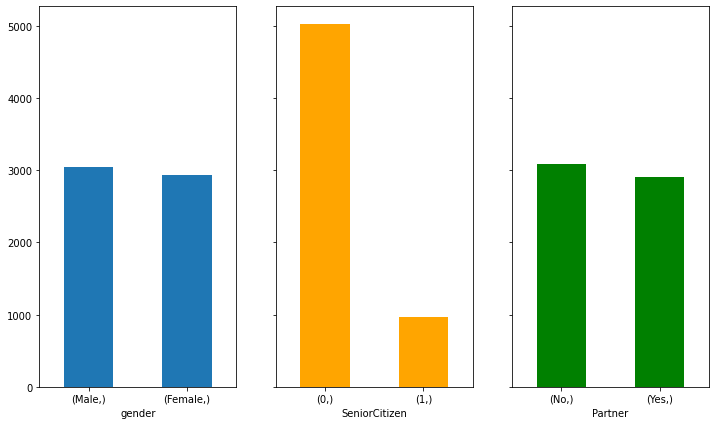

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12,7),sharey='all')
dataset[["gender"]].value_counts().plot(ax=axes[0], kind='bar',rot=0)
dataset[["SeniorCitizen"]].value_counts().plot(ax=axes[1], kind='bar',rot=0, color='orange') #0 - Not Retired , 1- Retired
dataset[["Partner"]].value_counts().plot(ax=axes[2], kind='bar',rot=0, color= 'green')
plt.show()
#basic visualizations

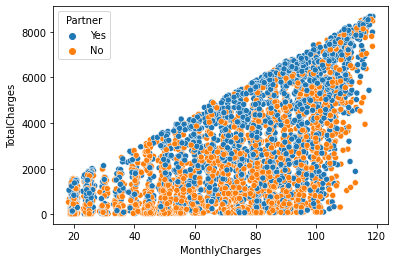

In [20]:
cont_values = dataset[['TotalCharges','MonthlyCharges','tenure','SeniorCitizen']]
sns.scatterplot(x=cont_values['MonthlyCharges'],y=cont_values['TotalCharges'], hue='Partner', data = dataset)
# monthlyCharges < TotalCharges, cause a monthly charge is part of the total charges
plt.show()

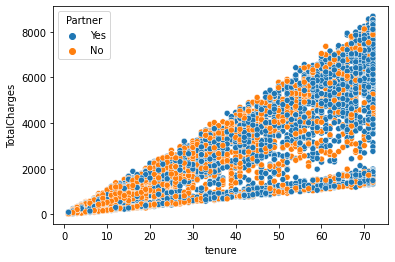

In [21]:
sns.scatterplot(x=cont_values['tenure'],y=cont_values['TotalCharges'], hue= "Partner", data=dataset) 
#There is some pattern, tenure is proportional with TotalCharges. 
#However, we see that small gape between tenure's values [45,60+]
plt.show()


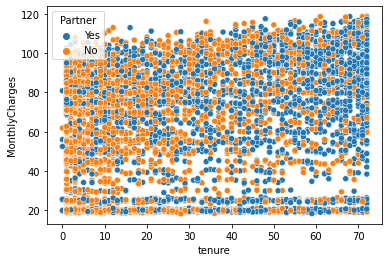

In [22]:
sns.scatterplot(x = "tenure", y = "MonthlyCharges", hue = "Partner", data = dataset)
plt.show()

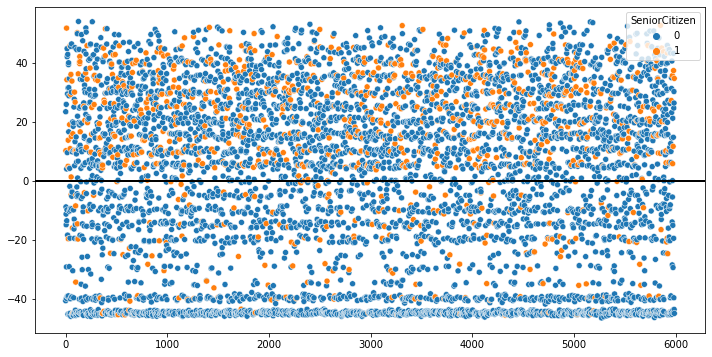

In [23]:
avg_monthly = dataset["MonthlyCharges"].mean()
monthly_centered = dataset["MonthlyCharges"] - avg_monthly

plt.figure(figsize = (12, 6))
#Remove .axhline() to remove the black line in the middle
sns.scatterplot(y = monthly_centered.values, x = monthly_centered.index, hue = dataset.SeniorCitizen).axhline(0, color = "black", linewidth = 2)
plt.show()
#The following scatterplot shows how much customers pay above or below the average monthly charges, and whether they are senior citizens or not.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


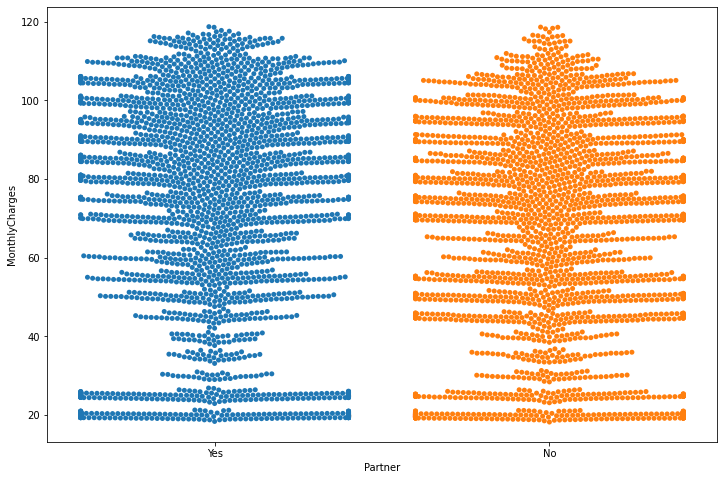

In [24]:
plt.figure(figsize = (12, 8))
sns.swarmplot(x = "Partner", y = "MonthlyCharges", data = dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


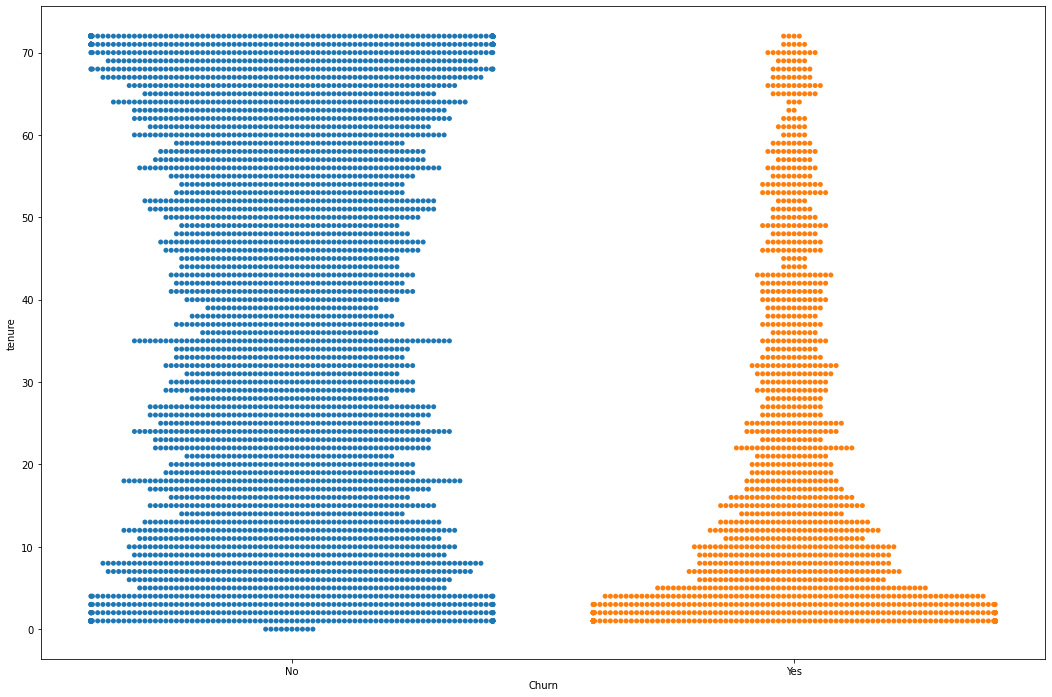

In [25]:
plt.figure(figsize = (18, 12))
sns.swarmplot(x = "Churn", y = "tenure", data = dataset)
plt.show()
#From the data above it seems that people with longer tenure renew their contracts much more.

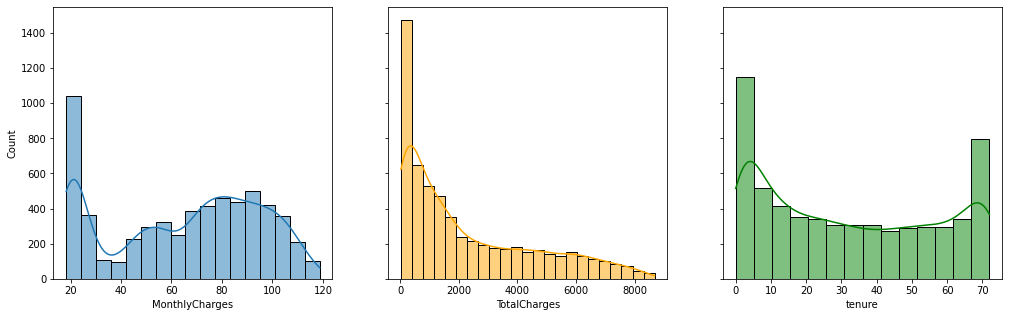

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5), sharey='all')
sns.histplot(data=dataset, x="MonthlyCharges", kde=True, ax=axs[0])
sns.histplot(data=dataset, x="TotalCharges", kde=True, color="orange", ax=axs[1])
sns.histplot(data=dataset, x="tenure", kde=True, color="green", ax=axs[2])
plt.show()

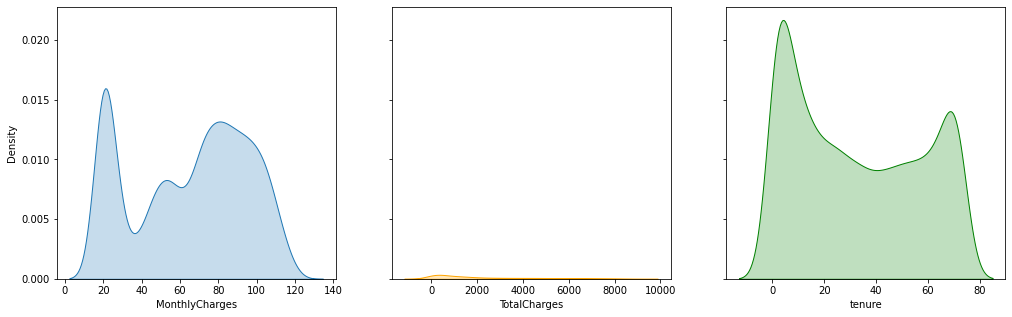

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5), sharey='all')
sns.kdeplot(data = dataset["MonthlyCharges"],shade=True, ax=axs[0])
sns.kdeplot(data = dataset["TotalCharges"],shade=True, ax=axs[1], color = 'orange')
sns.kdeplot(data = dataset["tenure"],shade=True, ax=axs[2], color = 'green')

plt.show()

<Figure size 1296x864 with 0 Axes>

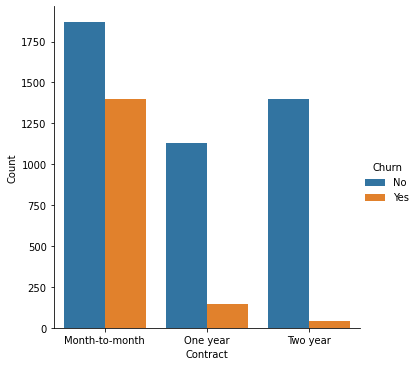

,Contract,Churn,Count
0,Month-to-month,No,1871
1,Month-to-month,Yes,1398
2,One year,No,1128
3,One year,Yes,148
4,Two year,No,1400
5,Two year,Yes,41


In [28]:
contract_vs_churn = dataset.groupby(["Contract", "Churn"]).Churn.agg([len])
contract_vs_churn = contract_vs_churn.reset_index().rename(columns = {"len": "Count"})

plt.figure(figsize = (18, 12))

sns.catplot(x = "Contract", y = "Count", hue = "Churn", kind = "bar", data = contract_vs_churn)

plt.show()
contract_vs_churn

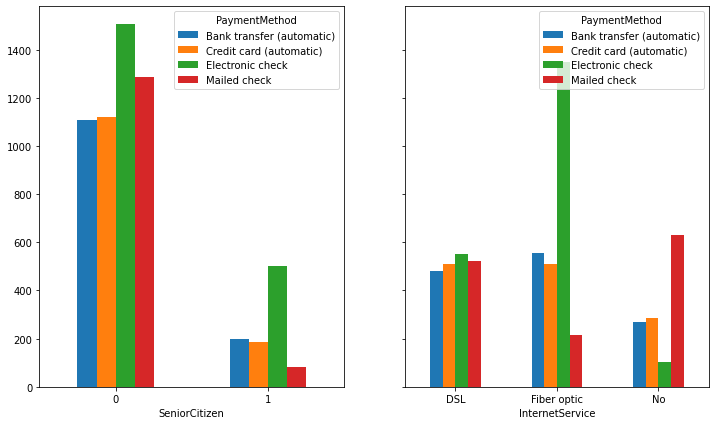

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7), sharey='all')
pd.crosstab(index=dataset['SeniorCitizen'],columns=dataset['PaymentMethod']).plot(kind='bar', ax=axs[0],rot=0)
pd.crosstab(index=dataset['InternetService'],columns=dataset['PaymentMethod']).plot(kind='bar', ax=axs[1],rot=0)
plt.show()

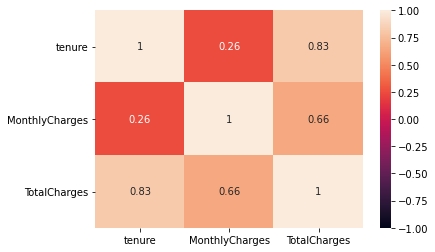

In [30]:
sns.heatmap(dataset[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), vmax=1, vmin=-1,annot=True,)

In [31]:
#Determine cardinality of the features
# NaN values are float64 values
dataset.describe(include='all').loc['unique', :]

gender                2
SeniorCitizen       NaN
Partner               2
Dependents            2
tenure              NaN
PhoneService          2
MultipleLines         3
InternetService       3
OnlineSecurity        3
OnlineBackup          3
DeviceProtection      3
TechSupport           3
StreamingTV           3
StreamingMovies       3
Contract              3
PaperlessBilling      2
PaymentMethod         4
MonthlyCharges      NaN
TotalCharges        NaN
Churn                 2
Name: unique, dtype: object

In [32]:
#profile = ProfileReport(dataset, title="Telecom Dataset", html={'style': {'full_width': True}}, sort="None")
#profile.to_notebook_iframe()
#profile.to_file(output_file="summary_dataset.html")

#**Data Imputation**



In [33]:
# dataset['TotalCharges']=dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean()) #fill nan values with mean of TotalCharges
# dataset['TotalCharges'].isnull().sum(axis=0)

imputer = KNNImputer(n_neighbors=3)
imputer.fit(dataset.loc[:, ['tenure','MonthlyCharges','TotalCharges']])
dataset[['tenure','MonthlyCharges','TotalCharges']] = imputer.transform(dataset[['tenure','MonthlyCharges','TotalCharges']])

dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.285502
std,0.367909,24.516391,30.114702,2274.100310
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


# **Encoding Data**

In [34]:
#Determine cardinality of the features
# NaN values are float64 values
dataset.describe(include='all').loc['unique', :]

gender                2
SeniorCitizen       NaN
Partner               2
Dependents            2
tenure              NaN
PhoneService          2
MultipleLines         3
InternetService       3
OnlineSecurity        3
OnlineBackup          3
DeviceProtection      3
TechSupport           3
StreamingTV           3
StreamingMovies       3
Contract              3
PaperlessBilling      2
PaymentMethod         4
MonthlyCharges      NaN
TotalCharges        NaN
Churn                 2
Name: unique, dtype: object

In [35]:
binary_features = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
numerical_features = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
other_features = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [36]:
#OrdinalEncoder
ord_enc = OrdinalEncoder()
encode_categorical = ord_enc.fit_transform(X=dataset[binary_features+other_features],y=dataset['Churn'])
encoded_data_ord=pd.DataFrame(encode_categorical,columns=dataset[binary_features+other_features].columns)
encoded_data_ord=encoded_data_ord.join(dataset[numerical_features])
encoded_data_ord.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0,72.0,24.10,1734.65
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0,44.0,88.15,3973.20
2,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,38.0,74.95,2869.85
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0,4.0,55.90,238.50
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0,2.0,53.45,119.50


In [37]:
#OneHotEncoder
one_enc = OneHotEncoder(handle_unknown='ignore', sparse = False)
encode_categorical = one_enc.fit_transform(X=dataset[binary_features+other_features].drop(columns=['Churn'],axis=1))
encoded_data_one=pd.DataFrame(encode_categorical,columns=one_enc.get_feature_names())
encoded_data_one=encoded_data_one.join(dataset[numerical_features]).join(encoded_data_ord['Churn'])
encoded_data_one.head()

,x0_Female,x0_Male,x1_No,x1_Yes,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,x5_No,x5_No phone service,x5_Yes,x6_DSL,x6_Fiber optic,x6_No,x7_No,x7_No internet service,x7_Yes,x8_No,x8_No internet service,x8_Yes,x9_No,x9_No internet service,x9_Yes,x10_No,x10_No internet service,x10_Yes,x11_No,x11_No internet service,x11_Yes,x12_No,x12_No internet service,x12_Yes,x13_Month-to-month,x13_One year,x13_Two year,x14_Bank transfer (automatic),x14_Credit card (automatic),x14_Electronic check,x14_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,72.0,24.10,1734.65,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,44.0,88.15,3973.20,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,38.0,74.95,2869.85,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,4.0,55.90,238.50,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2.0,53.45,119.50,0.0


In [38]:
#LabelEncoder
encoded_data_lab=dataset[binary_features+other_features].apply(LabelEncoder().fit_transform)
encoded_data_lab= encoded_data_lab.join(dataset[numerical_features])
encoded_data_lab.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,1,1,1,0,0,2,2,1,1,1,1,1,1,2,1,0,72.0,24.10,1734.65
1,0,0,0,1,1,0,0,1,0,2,2,0,2,0,0,1,0,44.0,88.15,3973.20
2,0,1,0,1,1,1,2,1,0,0,0,0,0,0,0,0,1,38.0,74.95,2869.85
3,1,0,0,1,1,0,0,0,0,0,0,0,0,2,0,2,0,4.0,55.90,238.50
4,1,0,0,1,0,0,0,0,2,0,2,0,0,0,0,2,0,2.0,53.45,119.50


# **Train, validation, test sets**

In [109]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

In [110]:
#OrdinalEncoder
ord_dataX= encoded_data_ord.drop(columns=['Churn'],axis=1)
ord_dataY= encoded_data_ord['Churn']

# train is now 75% of the entire data set
x_train_ord, x_test_ord, y_train_ord, y_test_ord = train_test_split(ord_dataX, ord_dataY, test_size=1 - train_ratio, random_state=0)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val_ord, x_test_ord, y_val_ord, y_test_ord = train_test_split(x_test_ord, y_test_ord, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

In [111]:
#OneHotEncoder
one_dataX= encoded_data_one.drop(columns=['Churn'],axis=1)
one_dataY= encoded_data_one['Churn']
x_train_one, x_test_one, y_train_one, y_test_one = train_test_split(one_dataX, one_dataY, test_size=1 - train_ratio, random_state=0)
x_val_one, x_test_one, y_val_one, y_test_one = train_test_split(x_test_one, y_test_one, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

In [112]:
#LabelEncoder
lab_dataX= encoded_data_lab.drop(columns=['Churn'],axis=1)
lab_dataY= encoded_data_lab['Churn']
x_train_lab, x_test_lab, y_train_lab, y_test_lab = train_test_split(lab_dataX, lab_dataY, test_size=1 - train_ratio,  random_state=0)
x_val_lab, x_test_lab, y_val_lab, y_test_lab = train_test_split(x_test_lab, y_test_lab, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

# **Baseline model** (Ordinal Encoder)

In [43]:
#Using OrdinalEncoder
dt= DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=10)
dt.fit(x_train_ord,y_train_ord)
print("Accuracy train: ",accuracy_score(y_train_ord,dt.predict(x_train_ord)))
print("Precision train: ",precision_score(y_train_ord,dt.predict(x_train_ord)))
print("Recall train: ", recall_score(y_train_ord,dt.predict(x_train_ord)))
print("F1 train:", f1_score(y_train_ord,dt.predict(x_train_ord)))

print("\nAccuracy validation: ",accuracy_score(y_val_ord,dt.predict(x_val_ord)))
print("Precision validation: ",precision_score(y_val_ord,dt.predict(x_val_ord)))
print("Recall validation: ",recall_score(y_val_ord,dt.predict(x_val_ord)))
print("F1 validation:", f1_score(y_val_ord,dt.predict(x_val_ord)))

print("\nFeatures importances:\n", (pd.Series(data=dt.feature_importances_,index=ord_dataX.columns)))

Accuracy train:  0.8701269770550234
Precision train:  0.7624454148471616
Recall train:  0.737331081081081
F1 train: 0.7496779733791327

Accuracy validation:  0.7505567928730512
Precision validation:  0.5416666666666666
Recall validation:  0.5327868852459017
F1 validation: 0.5371900826446282

Features importances:
 gender              0.011066
Partner             0.007904
Dependents          0.005241
PhoneService        0.006013
PaperlessBilling    0.016947
MultipleLines       0.018512
InternetService     0.018121
OnlineSecurity      0.050097
OnlineBackup        0.009234
DeviceProtection    0.006613
TechSupport         0.008228
StreamingTV         0.009441
StreamingMovies     0.012790
Contract            0.307874
PaymentMethod       0.040311
SeniorCitizen       0.018277
tenure              0.124138
MonthlyCharges      0.150334
TotalCharges        0.178860
dtype: float64


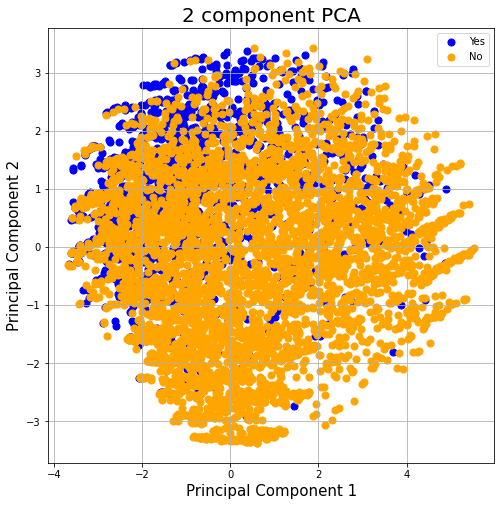

In [44]:
pca = PCA(n_components=2)
data_copy= pd.DataFrame(StandardScaler().fit_transform(encoded_data_ord), columns= binary_features+other_features+numerical_features)
principalComponents = pca.fit_transform(data_copy.drop(columns=['Churn'], axis=1))
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dataset[['Churn']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Yes', 'No']
colors = ['blue', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Churn'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
#Which is separable, cause 
#the top half of the plot has more oragne than blue dots, and the bottom half has more blue than orange dots

In [45]:
# import graphviz
# text = export_text(dt)
# viz = export_graphviz(dt,out_file=None,class_names='Churn', filled=True, rounded=True, special_characters=True)
# graphviz.Source(viz).render('tree')

#One Hot Encoder Model

In [46]:
#Using OneHotEncoder

dt_one_hot = DecisionTreeClassifier(criterion="entropy", 
                                   max_depth=10,
                                   random_state=0)
dt_one_hot.fit(x_train_one, y_train_one)

print("Accuracy train: ",
      accuracy_score(y_train_one, dt_one_hot.predict(x_train_one)))
print("Precision train: ", 
      precision_score(y_train_one, dt_one_hot.predict(x_train_one)))
print("Recall train: ", 
      recall_score(y_train_one, dt_one_hot.predict(x_train_one)))
print("F1 train:", f1_score(y_train_one, dt_one_hot.predict(x_train_one)))

print("\nAccuracy validation: ", 
      accuracy_score(y_val_one, dt_one_hot.predict(x_val_one)))
print("Precision validation: ", 
      precision_score(y_val_one, dt_one_hot.predict(x_val_one)))
print("Recall validation: ", 
      recall_score(y_val_one, dt_one_hot.predict(x_val_one)))
print("F1 validation:", f1_score(y_val_one, dt_one_hot.predict(x_val_one)))

print("\nFeatures importances:\n", 
      (pd.Series(data=dt_one_hot.feature_importances_,index=one_dataX.columns)))


Accuracy train:  0.877478280240588
Precision train:  0.8182730923694779
Recall train:  0.6883445945945946
F1 train: 0.7477064220183486

Accuracy validation:  0.7427616926503341
Precision validation:  0.5302325581395348
Recall validation:  0.4672131147540984
F1 validation: 0.49673202614379086

Features importances:
 x0_Female                        0.003386
x0_Male                          0.005114
x1_No                            0.005531
x1_Yes                           0.005907
x2_No                            0.006642
x2_Yes                           0.005448
x3_No                            0.001960
x3_Yes                           0.002703
x4_No                            0.011156
x4_Yes                           0.009974
x5_No                            0.009587
x5_No phone service              0.000000
x5_Yes                           0.004350
x6_DSL                           0.000000
x6_Fiber optic                   0.048511
x6_No                            0.000000
x7_No      

#Label Encoder Model

In [47]:
#Using LabelEncoder
dt_label = DecisionTreeClassifier(criterion="entropy",
                                  max_depth=10,
                                  random_state=0)
dt_label.fit(x_train_lab, y_train_lab)

print("Accuracy train: ", 
      accuracy_score(y_train_lab, dt_label.predict(x_train_lab)))
print("Precision train: ", 
      precision_score(y_train_lab, dt_label.predict(x_train_lab)))
print("Recall train: ", 
      recall_score(y_train_lab, dt_label.predict(x_train_lab)))
print("F1 train:", f1_score(y_train_lab, dt_label.predict(x_train_lab)))

print("\nAccuracy validation: ", 
      accuracy_score(y_val_lab, dt_label.predict(x_val_lab)))
print("Precision validation: ", 
      precision_score(y_val_lab, dt_label.predict(x_val_lab)))
print("Recall validation: ", 
      recall_score(y_val_lab, dt_label.predict(x_val_lab)))
print("F1 validation:", f1_score(y_val_lab, dt_label.predict(x_val_lab)))

print("\nFeatures importances:\n", 
      (pd.Series(data=dt_label.feature_importances_,index=lab_dataX.columns)))

Accuracy train:  0.8701269770550234
Precision train:  0.7624454148471616
Recall train:  0.737331081081081
F1 train: 0.7496779733791327

Accuracy validation:  0.7505567928730512
Precision validation:  0.5416666666666666
Recall validation:  0.5327868852459017
F1 validation: 0.5371900826446282

Features importances:
 gender              0.011066
Partner             0.007904
Dependents          0.005241
PhoneService        0.006013
PaperlessBilling    0.016947
MultipleLines       0.018512
InternetService     0.018121
OnlineSecurity      0.050097
OnlineBackup        0.009234
DeviceProtection    0.006613
TechSupport         0.008228
StreamingTV         0.009441
StreamingMovies     0.012790
Contract            0.307874
PaymentMethod       0.040311
SeniorCitizen       0.018277
tenure              0.124138
MonthlyCharges      0.150334
TotalCharges        0.178860
dtype: float64


#Hyperparameter tuning

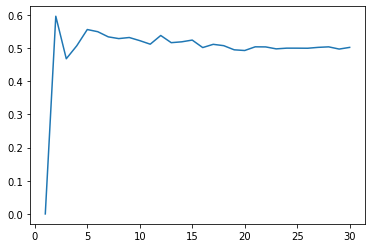

Scores: {1: 0.0, 2: 0.5953450302555193, 3: 0.46732240382195567, 4: 0.5064701114738244, 5: 0.5553370542674931, 6: 0.5487849272003998, 7: 0.5332788802447178, 8: 0.528019163848486, 9: 0.5312985892504066, 10: 0.5218950891405418, 11: 0.5111641674713385, 12: 0.5374022659559973, 13: 0.5157524141624413, 14: 0.518321074731675, 15: 0.5235559184174713, 16: 0.5010183007271507, 17: 0.5107588181937515, 18: 0.5067298987095364, 19: 0.4942365437634774, 20: 0.4921522148215985, 21: 0.5032512667939014, 22: 0.5029723060184891, 23: 0.49709555917638115, 24: 0.49924317074926544, 25: 0.49919331684386864, 26: 0.4989682063883424, 27: 0.5016072045423778, 28: 0.5031727734179771, 29: 0.49647793499058623, 30: 0.5015400342832101}


In [48]:
test_depths = [j for j in range(1, 31)]
scores = dict()
for depth in test_depths:
  model = DecisionTreeClassifier(criterion="entropy",
                                 max_depth=depth,
                                 random_state = 0)
  s = cross_val_score(model, pd.concat([x_train_ord,x_val_ord]),  pd.concat([y_train_ord,y_val_ord]), cv=5, scoring="f1")
  scores[depth] = s.mean()

sns.lineplot(x=scores.keys(), y=scores.values())
plt.show()

print(f"Scores: {scores}")

In [49]:
dt_tuned = DecisionTreeClassifier(criterion="entropy",
                                  max_depth=2,
                                  random_state=0)

dt_tuned.fit(x_train_ord, y_train_ord)
acc = accuracy_score(y_test_ord, dt_tuned.predict(x_test_ord))
rec = recall_score(y_test_ord, dt_tuned.predict(x_test_ord))
pre = precision_score(y_test_ord, dt_tuned.predict(x_test_ord))
f1 = f1_score(y_test_ord, dt_tuned.predict(x_test_ord))

print(f"Tuned model accuracy: {acc}")
print(f"Tuned model precision: {pre}")
print(f"Tuned model recall: {rec}")
print(f"Tuned model f1 score: {f1}")


Tuned model accuracy: 0.7529215358931552
Tuned model precision: 0.5242290748898678
Tuned model recall: 0.7484276729559748
Tuned model f1 score: 0.616580310880829


#Random Forest Model

In [50]:
#Try RandomForestClassifier

rfc = RandomForestClassifier(criterion="entropy", random_state=0)
rfc.fit(x_test_ord, y_test_ord)

acc = accuracy_score(y_train_ord, dt_tuned.predict(x_train_ord))
rec = recall_score(y_train_ord, dt_tuned.predict(x_train_ord))
pre = precision_score(y_train_ord, dt_tuned.predict(x_train_ord))
f1 = f1_score(y_train_ord, dt_tuned.predict(x_train_ord))

print(f"Random Forest accuracy (train): {acc}")
print(f"Random Forest precision (train): {pre}")
print(f"Random Forest recall (train): {rec}")
print(f"Random Forest f1 score (train): {f1}\n\n")

acc = accuracy_score(y_val_ord, dt_tuned.predict(x_val_ord))
rec = recall_score(y_val_ord, dt_tuned.predict(x_val_ord))
pre = precision_score(y_val_ord, dt_tuned.predict(x_val_ord))
f1 = f1_score(y_val_ord, dt_tuned.predict(x_val_ord))

print(f"Random Forest accuracy (validation): {acc}")
print(f"Random Forest precision (validation): {pre}")
print(f"Random Forest recall (validation): {rec}")
print(f"Random Forest f1 score (validation): {f1}")

Random Forest accuracy (train): 0.7415905546892404
Random Forest precision (train): 0.5071942446043165
Random Forest recall (train): 0.714527027027027
Random Forest f1 score (train): 0.5932678821879382


Random Forest accuracy (validation): 0.7461024498886414
Random Forest precision (validation): 0.5239520958083832
Random Forest recall (validation): 0.7172131147540983
Random Forest f1 score (validation): 0.6055363321799307


#Random Forest Hyperparameter Tuning

In [51]:
n_estimators = [i for i in range(100, 1001, 100)]
max_features = ['auto', 'sqrt']
max_depth = [i for i in range(4, 21, 2)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [52]:
model = RandomForestClassifier()
rf_rand = RandomizedSearchCV(estimator=model, param_distributions=random_grid,
                             n_iter=100, scoring="f1", n_jobs=-1, cv=3,
                             random_state=0)

rf_rand.fit(x_train_ord, y_train_ord)
rf_rand.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 100}

In [53]:
rf_best = rf_rand.best_estimator_
rf_best.fit(x_train_ord, y_train_ord)

acc = accuracy_score(y_test_ord, rf_best.predict(x_test_ord))
rec = recall_score(y_test_ord, rf_best.predict(x_test_ord))
pre = precision_score(y_test_ord, rf_best.predict(x_test_ord))
f1 = f1_score(y_test_ord, rf_best.predict(x_test_ord))

print(f"Tuned model accuracy: {acc}")
print(f"Tuned model precision: {pre}")
print(f"Tuned model recall: {rec}")
print(f"Tuned model f1 score: {f1}")

Tuned model accuracy: 0.7863105175292153
Tuned model precision: 0.6347826086956522
Tuned model recall: 0.4591194968553459
Tuned model f1 score: 0.5328467153284672


##Hyperparameter tuning without RandomizedSearchCV

In [54]:
estimators = [i for i in range(100, 350, 50)]
scores = dict()

for est in estimators:
  model = RandomForestClassifier(criterion="gini", 
                                 n_estimators=est,
                                 random_state=0)
  s = cross_val_score(model, pd.concat([x_train_ord,x_val_ord]),  pd.concat([y_train_ord,y_val_ord]), scoring="f1", cv=5)
  scores[est] = s.mean()


In [55]:
best_est = max(scores.items(), key = lambda x: x[1])[0]
depths = [i for i in range(5, 16)]
scores=dict()

for depth in depths:
  model = RandomForestClassifier(criterion="gini",
                                 max_depth=depth,
                                 n_estimators=best_est,
                                 random_state=0)
  s = cross_val_score(model, pd.concat([x_train_ord,x_val_ord]),  pd.concat([y_train_ord,y_val_ord]), scoring="f1", cv=5)
  scores[depth] = s.mean()

In [56]:
best_depth = max(scores.items(), key=lambda x: x[1])[0]

rfc_tuned = RandomForestClassifier(n_estimators=best_est, 
                                   criterion="entropy",
                                   max_depth=best_depth,
                                   random_state=0)


rfc_tuned.fit(x_train_ord, y_train_ord)
acc = accuracy_score(y_test_ord, rfc_tuned.predict(x_test_ord))
rec = recall_score(y_test_ord, rfc_tuned.predict(x_test_ord))
pre = precision_score(y_test_ord, rfc_tuned.predict(x_test_ord))
f1 = f1_score(y_test_ord, rfc_tuned.predict(x_test_ord))

print(f"Tuned model accuracy: {acc}")
print(f"Tuned model precision: {pre}")
print(f"Tuned model recall: {rec}")
print(f"Tuned model f1 score: {f1}")

Tuned model accuracy: 0.7846410684474123
Tuned model precision: 0.6229508196721312
Tuned model recall: 0.4779874213836478
Tuned model f1 score: 0.5409252669039145


# Naive Bayes

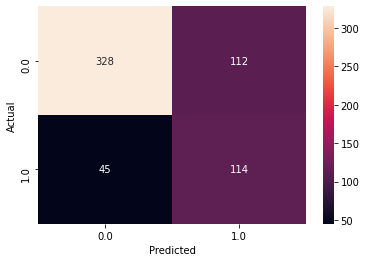

In [57]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train_ord, y_train_ord)

predicted = naive_bayes.predict(x_test_ord)

result_df = pd.DataFrame({'actual': y_test_ord, 'predicted': predicted})
confusion_matrix = pd.crosstab(result_df['actual'],result_df['predicted'],rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.show()

In [58]:
print("\nAccuracy training: ", 
      accuracy_score(y_train_ord, naive_bayes.predict(x_train_ord)))
print("Precision training: ", 
      precision_score(y_train_ord, naive_bayes.predict(x_train_ord)))
print("Recall training: ", 
      recall_score(y_train_ord, naive_bayes.predict(x_train_ord)))
print("F1 training:", 
      f1_score(y_train_ord, naive_bayes.predict(x_train_ord)))

print("\nAccuracy validation: ", 
      accuracy_score(y_val_ord, naive_bayes.predict(x_val_ord)))
print("Precision validation: ", 
      precision_score(y_val_ord, naive_bayes.predict(x_val_ord)))
print("Recall validation: ", 
      recall_score(y_val_ord, naive_bayes.predict(x_val_ord)))
print("F1 validation:", f1_score(y_val_ord, naive_bayes.predict(x_val_ord)))

print("\nAccuracy test: ", 
      accuracy_score(y_test_ord, naive_bayes.predict(x_test_ord)))
print("Precision test: ", 
      precision_score(y_test_ord, naive_bayes.predict(x_test_ord)))
print("Recall test: ", 
      recall_score(y_test_ord, naive_bayes.predict(x_test_ord)))
print("F1 test:", f1_score(y_test_ord, naive_bayes.predict(x_test_ord)))


Accuracy training:  0.7493873914012029
Precision training:  0.5175699821322216
Recall training:  0.7339527027027027
F1 training: 0.6070555361508907

Accuracy validation:  0.7583518930957683
Precision validation:  0.542319749216301
Recall validation:  0.7090163934426229
F1 validation: 0.6145648312611012

Accuracy test:  0.7378964941569283
Precision test:  0.504424778761062
Recall test:  0.7169811320754716
F1 test: 0.5922077922077922


## Cross Validation

In [59]:
hyper_model = GaussianNB()
nb_scores = cross_validate(hyper_model, pd.concat([x_train_ord,x_val_ord]), pd.concat([y_train_ord,y_val_ord]), scoring='f1_macro', cv=15)
nb_scores

{'fit_time': array([0.00893211, 0.00481629, 0.00514865, 0.0043478 , 0.00468421,
        0.00459456, 0.0046289 , 0.00451422, 0.00514531, 0.00454235,
        0.00431085, 0.00438595, 0.00485921, 0.00447559, 0.00440717]),
 'score_time': array([0.00229311, 0.00287175, 0.00203109, 0.00208282, 0.00219512,
        0.0022006 , 0.00212622, 0.00220776, 0.00215578, 0.00201607,
        0.00203013, 0.00219822, 0.00225759, 0.00209808, 0.00204134]),
 'test_score': array([0.70998327, 0.69113321, 0.683019  , 0.73344922, 0.71722163,
        0.7004495 , 0.6890276 , 0.77399453, 0.69794128, 0.72490421,
        0.73656747, 0.74554312, 0.65766052, 0.70610852, 0.74292875])}

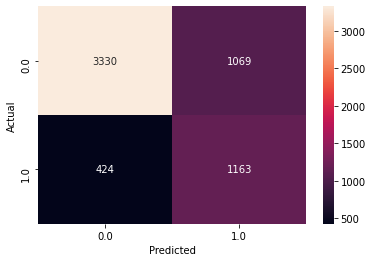

In [60]:
predicted = cross_val_predict(hyper_model, ord_dataX , ord_dataY, cv=15)
result_df = pd.DataFrame({'actual': ord_dataY, 'predicted': predicted})
confusion_matrix = pd.crosstab(result_df['actual'],result_df['predicted'],rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt='g')

# Bayesian Network 

In [61]:
discrete_data = dataset.drop(numerical_features, axis = "columns")

data_train, data_test = train_test_split(discrete_data, test_size = 0.2,
                                         random_state = 0)
data_train = data_train.to_numpy()

y_test = data_test.to_numpy()
X_test = data_test.assign(Churn = None)
X_test = X_test.to_numpy()

In [62]:
bn = BayesianNetwork.from_samples(data_train, algorithm = "chow-liu",
                                  state_names = dataset.columns.values)

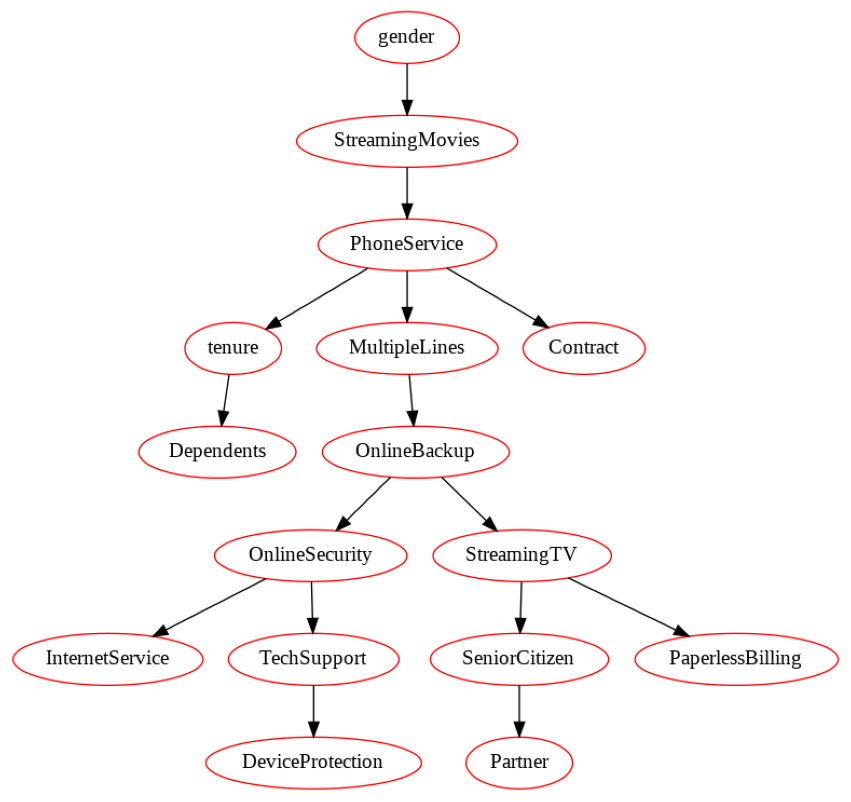

In [66]:
plt.figure(figsize = (15, 15))
bn.plot()

In [67]:
bn.sample()

array([['Female', 'Yes', 'No', 'Yes', 'No', 'No', 'No internet service',
        'No internet service', 'No internet service',
        'No internet service', 'No internet service',
        'No internet service', 'Two year', 'Yes',
        'Bank transfer (automatic)', 'No']], dtype='<U25')

In [68]:
print(f"Model accuracy: {round(bn.score(X_test, y_test), 3)}")

Model accuracy: 0.984


# KNN Classification

## Scaling the dataset

In [69]:
# x_train_ord  y_train_ord
# x_val_ord    y_val_ord
# x_test_ord   y_test_ord

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_ord)
x_val_scaled = scaler.transform(x_val_ord)
x_test_scaled = scaler.transform(x_test_ord)

## Training a model

In [70]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scaled, y_train_ord)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
y_pred = knn_classifier.predict(x_val_scaled)

print(confusion_matrix(y_val_ord, y_pred))
print(classification_report(y_val_ord, y_pred))

[[562  92]
 [118 126]]
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       654
         1.0       0.58      0.52      0.55       244

    accuracy                           0.77       898
   macro avg       0.70      0.69      0.69       898
weighted avg       0.76      0.77      0.76       898



## Improving the model
Since it's known that the KNN algorithm works best with
lower dimensional data and it doensn't work best with categorical variables we'll get rid of those and see if that improves our model.

In [72]:
# Selecting columns
x_train_scaled = x_train_ord[numerical_features].drop(columns=["SeniorCitizen"])
x_val_scaled = x_val_ord[numerical_features].drop(columns=["SeniorCitizen"])
x_test_scaled = x_test_ord[numerical_features].drop(columns=["SeniorCitizen"])

x_train_scaled = scaler.fit_transform(x_train_scaled)
x_val_scaled = scaler.transform(x_val_scaled)
x_test_scaled = scaler.transform(x_test_scaled)

In [73]:
# Training the model
knn_classifier.fit(x_train_scaled, y_train_ord)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
# Testing the model
y_pred = knn_classifier.predict(x_val_scaled)

print(confusion_matrix(y_val_ord, y_pred))
print(classification_report(y_val_ord, y_pred))

[[583  71]
 [131 113]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       654
         1.0       0.61      0.46      0.53       244

    accuracy                           0.78       898
   macro avg       0.72      0.68      0.69       898
weighted avg       0.76      0.78      0.76       898



We can see the model isn't much better or worse than the previous one, but since it has a lower dimensionality it's more efficient to train so we will keep using it.

## Hyperparameter Tuning

In [75]:
error = []

for i in  range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_scaled, y_train_ord)
  y_pred = knn.predict(x_val_scaled)
  error.append(np.mean(y_pred != y_val_ord))

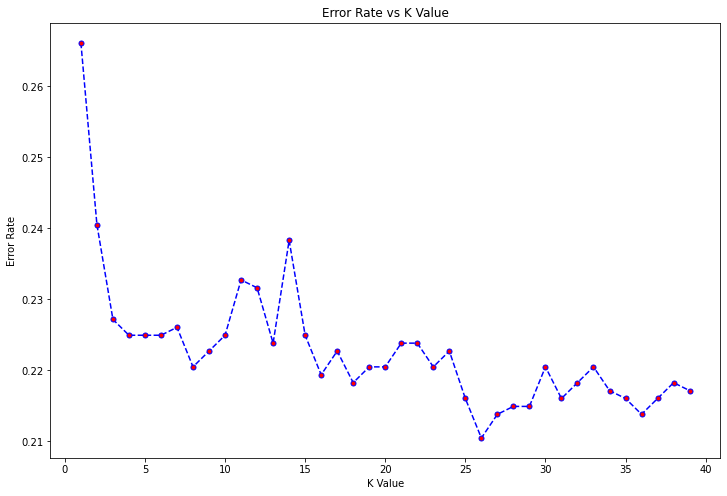

In [76]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 40), error, color="blue", linestyle="dashed", marker = "o",
         markerfacecolor="red", markersize=5)
plt.title("Error Rate vs K Value")
plt.ylabel("Error Rate")
plt.xlabel("K Value")
plt.show()

From the graph it's clear that the model model has the lowest error for n_neighbours = 26, so we will train and test a model with that value.

## Tuned Model

In [77]:
knn_tuned = KNeighborsClassifier(n_neighbors=26)
knn_tuned.fit(x_train_scaled, y_train_ord)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

In [78]:
y_pred = knn_tuned.predict(x_train_scaled)
print("Train set: ")
print(confusion_matrix(y_train_ord, y_pred))
print(classification_report(y_train_ord, y_pred))

y_pred = knn_tuned.predict(x_val_scaled)
print("Validation set: ")
print(confusion_matrix(y_val_ord, y_pred))
print(classification_report(y_val_ord, y_pred))

y_pred = knn_tuned.predict(x_test_scaled)
print("Test set: ")
print(confusion_matrix(y_test_ord, y_pred))
print(classification_report(y_test_ord, y_pred))

Train set: 
[[3085  220]
 [ 670  514]]
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      3305
         1.0       0.70      0.43      0.54      1184

    accuracy                           0.80      4489
   macro avg       0.76      0.68      0.70      4489
weighted avg       0.79      0.80      0.78      4489

Validation set: 
[[611  43]
 [146  98]]
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       654
         1.0       0.70      0.40      0.51       244

    accuracy                           0.79       898
   macro avg       0.75      0.67      0.69       898
weighted avg       0.78      0.79      0.77       898

Test set: 
[[401  39]
 [ 99  60]]
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       440
         1.0       0.61      0.38      0.47       159

    accuracy                           0.77       599
   macro avg   

From the classification reports it doesn't seem that the model is overfitting, but it's not a big improvement on the previous models.

# KNN Regression with hyperparameter tuning
1. How long is their tenure before fail to renew the subscription (churn: No)  
2. Predicting Monthly charges

## Tuning n_neighbors #1

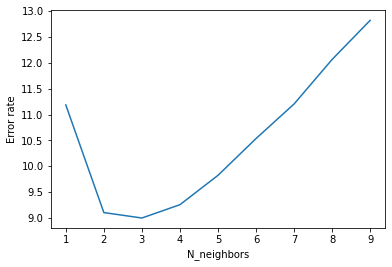

Scores: {1: 11.18587371239736, 2: 9.105909030855429, 3: 9.000750925268807, 4: 9.257779643916015, 5: 9.825334156034904, 6: 10.536197005001506, 7: 11.204401920162528, 8: 12.064870170537372, 9: 12.820965952790585}


In [79]:
churn_no = encoded_data_ord.loc[encoded_data_ord['Churn']==0]
test_neighbors = [j for j in range(1, 10)]
scores = dict()
for neighbors in test_neighbors:
  model = KNeighborsRegressor(n_neighbors=neighbors, weights='distance')
  s = cross_val_score(model, churn_no.drop(columns=['tenure'],axis=1), churn_no['tenure'], cv=15, scoring="neg_mean_squared_error")
  scores[neighbors] = abs(s.mean())

sns.lineplot(x=scores.keys(), y=scores.values(), markers='o')
plt.xlabel("N_neighbors")
plt.ylabel("Error rate")
plt.show()

print(f"Scores: {scores}")

## Tuning n_neighbors #2

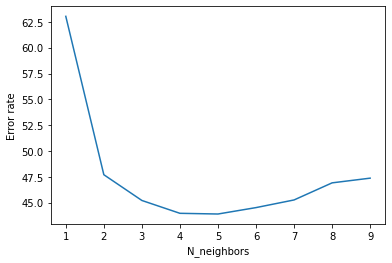

Scores: {1: 63.030062788461535, 2: 47.70835861681282, 3: 45.217313756643804, 4: 43.97525093915684, 5: 43.90794460968216, 6: 44.528214536252804, 7: 45.26813464211394, 8: 46.92160759349365, 9: 47.37704191248527}


In [80]:
monthly_charges = encoded_data_ord.drop(columns=['tenure', 'TotalCharges'])
test_neighbors = [j for j in range(1, 10)]
scores = dict()
for neighbors in test_neighbors:
  model = KNeighborsRegressor(n_neighbors=neighbors, weights='distance')
  s = cross_val_score(model, monthly_charges.drop(columns=['MonthlyCharges'],axis=1), monthly_charges['MonthlyCharges'], cv=20, scoring="neg_mean_squared_error")
  scores[neighbors] = abs(s.mean())

sns.lineplot(x=scores.keys(), y=scores.values())
plt.xlabel("N_neighbors")
plt.ylabel("Error rate")
plt.show()

print(f"Scores: {scores}")

#Regression

## Linear Regression

Here we will use monthly charges and tenure to predict the total charges
of a customer (since only those 3 variables are numeric)

In [81]:
# Getting the variables
y = dataset["TotalCharges"]
X = dataset.loc[:, ["MonthlyCharges", "tenure"]]

# Test train split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [82]:
lm = LinearRegression().fit(x_train, y_train)

pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])

,Coefficient
MonthlyCharges,36.222508
tenure,65.275842


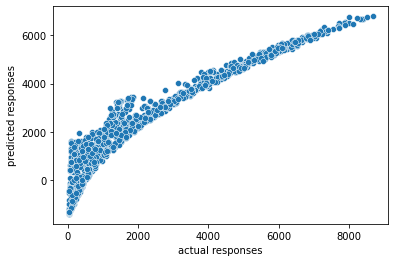

In [83]:
y_pred = lm.predict(x_test)

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("actual responses")
plt.ylabel("predicted responses")
plt.show()

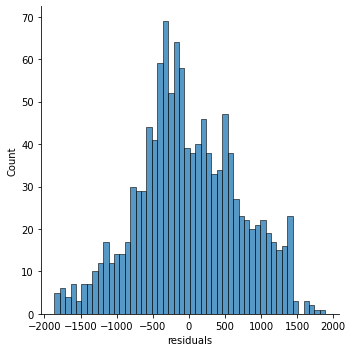

In [84]:
sns.displot(y_test-y_pred, bins=50)
plt.xlabel("residuals")
plt.show()

In [85]:
# Metrics
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

MAE: 571.0572838520872
MSE: 501888.16177755286
RMSE: 708.440655085204


## Polynomial Features

Text(0, 0.5, 'predicted responses')

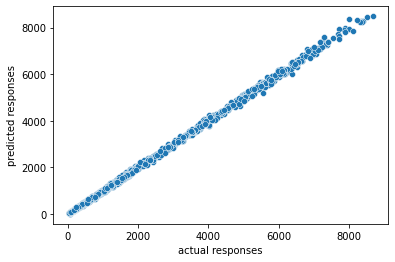

In [86]:
# Making the model
pol_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
pol_model.fit(x_train, y_train)

y_pred = pol_model.predict(x_test)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("actual responses")
plt.ylabel("predicted responses")

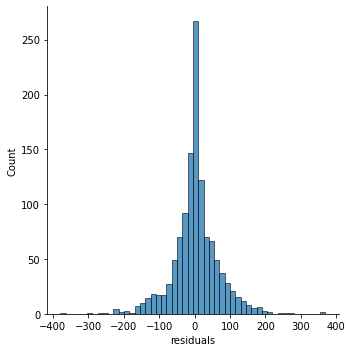

In [87]:
sns.displot(y_test-y_pred, bins=50)
plt.xlabel("residuals")
plt.show()

In [88]:
# Metrics
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

MAE: 44.185921475830234
MSE: 4403.71803350708
RMSE: 66.36051562116647


## Lasso (L1- regularization)

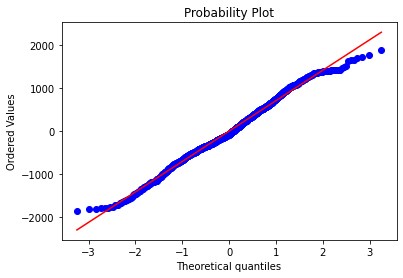

In [89]:
alphas = np.logspace(-3,3, 30)
lasso_model = LassoCV(alphas=alphas, random_state= 0, max_iter=10000)

lasso_model.fit(x_train,y_train)
y_pred = lasso_model.predict(x_test)
#QQ plot
stats.probplot(y_test-y_pred, dist="norm", plot=plt)
plt.show()

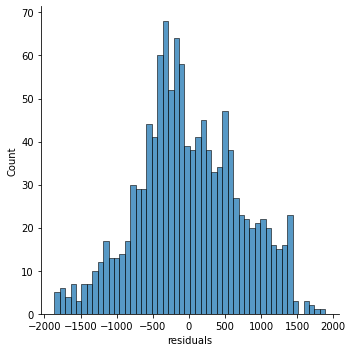

In [90]:
sns.displot(y_test-y_pred, bins=50)
plt.xlabel("residuals")
plt.show()

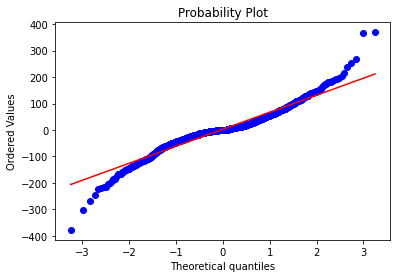

In [91]:
poly_model_lasso = make_pipeline(PolynomialFeatures(2), Lasso(alpha = 1))
poly_model_lasso.fit(x_train, y_train)
y_pred = poly_model_lasso.predict(x_test)
#QQ plot
stats.probplot(y_test-y_pred, dist="norm", plot=plt)
plt.show()

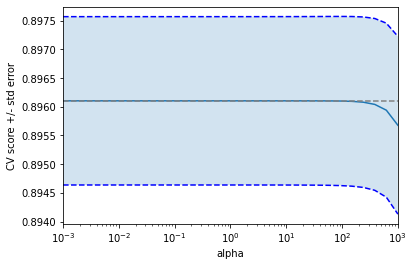

In [92]:
clf = GridSearchCV(Lasso(random_state=0,max_iter=7500), param_grid=[{"alpha":alphas}], cv=5, refit=False)
clf.fit(X,y)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

plt.semilogx(alphas, means)

std_error = stds/ np.sqrt(5) # 5 cause folds = 5
plt.semilogx(alphas, means + std_error, 'b--')
plt.semilogx(alphas, means - std_error, 'b--')

plt.fill_between(alphas, means+std_error, means-std_error, alpha=0.2)

plt.xlabel('alpha')
plt.ylabel('CV score +/- std error')
plt.axhline(np.max(means), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()


## Ridge (L2- regularization)

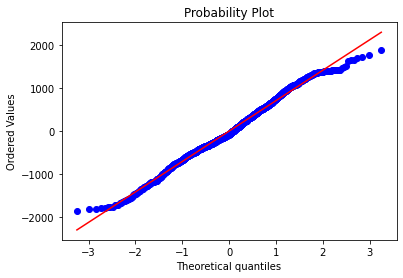

In [93]:
alphas = np.logspace(-3,3, 30)
ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(x_train,y_train)
y_pred = ridge_model.predict(x_test)
#QQ plot
stats.probplot(y_test-y_pred, dist="norm", plot=plt)
plt.show()

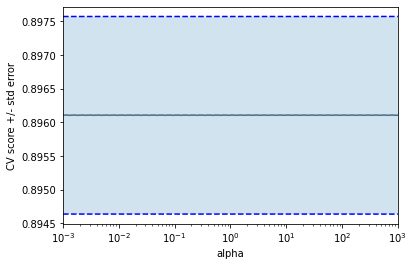

In [94]:
clf = GridSearchCV(Ridge(), param_grid=[{"alpha":alphas}], cv=5, refit=False)
clf.fit(X,y)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

plt.semilogx(alphas, means)

std_error = stds/ np.sqrt(5) # 5 cause folds = 5
plt.semilogx(alphas, means + std_error, 'b--')
plt.semilogx(alphas, means - std_error, 'b--')

plt.fill_between(alphas, means+std_error, means-std_error, alpha=0.2)

plt.xlabel('alpha')
plt.ylabel('CV score +/- std error')
plt.axhline(np.max(means), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

# Logistic

In [95]:
model = LogisticRegression(solver= 'newton-cg', random_state=172)
model.fit(x_train_ord, y_train_ord)
y_pred = model.predict(x_test_ord)
print(classification_report(y_test_ord, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       440
         1.0       0.69      0.55      0.61       159

    accuracy                           0.81       599
   macro avg       0.77      0.73      0.75       599
weighted avg       0.81      0.81      0.81       599



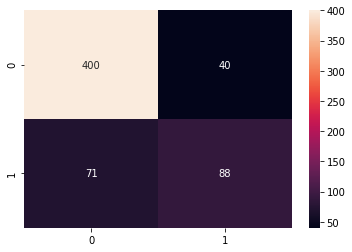

In [96]:
sns.heatmap(confusion_matrix(y_test_ord, y_pred), annot=True, fmt="1")

In [97]:
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

In [98]:
probas = model.predict_proba(x_test_ord)[:, 1]

In [99]:
roc_values = []
aroc_score=0
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    aroc_score = max(aroc_score,roc_auc_score(y_test_ord, preds))
    tn, fp, fn, tp = confusion_matrix(y_test_ord, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

Roc Auc score:  0.748048885077187


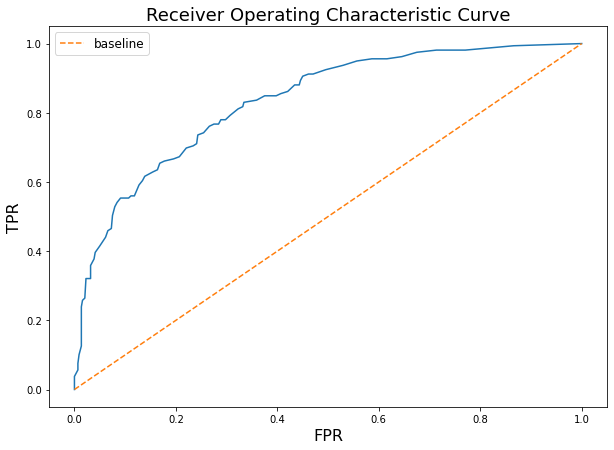

In [100]:
print("Roc Auc score: ", aroc_score)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

## Feature selection

Top 3 features that fits model with Logistic Regression:

**1. PhoneService**  
**2. Contract**  
**3. PaperlessBilling** 

gender: 0.11289
Partner: 0.08902
Dependents: 0.14662
PhoneService: 0.98936
PaperlessBilling: 0.32729
MultipleLines: 0.03203
InternetService: 0.22300
OnlineSecurity: 0.23109
OnlineBackup: 0.14707
DeviceProtection: 0.10219
TechSupport: 0.24062
StreamingTV: 0.01360
StreamingMovies: 0.00236
Contract: 0.80745
PaymentMethod: 0.05190
SeniorCitizen: 0.22281
tenure: 0.06502
MonthlyCharges: 0.02098
TotalCharges: 0.00039


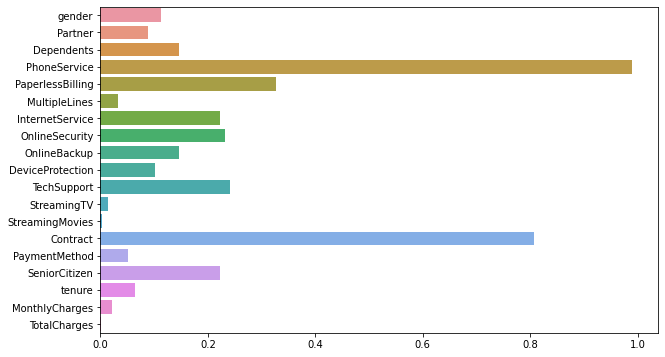

In [101]:
fig = plt.figure(figsize=(10,6))
importance = abs(model.coef_[0])
features = ord_dataX.columns
# summarize feature importance
for i,v in zip(features,importance):
	print('%s: %.5f' % (i,v))
# plot feature importance
sns.barplot(x=importance, y=features)
plt.show()

In [102]:
interactions = [com for sub in range(1,19) for com in combinations(ord_dataX, sub)]
len(interactions)

524286

In [103]:
#To 1000th combination of features
Y = ord_dataY
acc_scores=list()
for combination in interactions[:1000]:
  X = ord_dataX[list(combination)]
  x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=0)
  model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc_scores.append(accuracy_score(y_test,y_pred))

print("0-1000 The biggest accuracy is: ", max(acc_scores))
print("With features: ")
print(interactions[acc_scores.index(max(acc_scores))])

0-1000 The biggest accuracy is:  0.8030050083472454
With features: 
('OnlineSecurity', 'MonthlyCharges', 'TotalCharges')


In [104]:
Y = ord_dataY
acc_scores=list()
for combination in interactions[10000:12000]:
  X = ord_dataX[list(combination)]
  x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=0)
  model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc_scores.append(accuracy_score(y_test,y_pred))

print("10000-12000 The biggest accuracy is: ", max(acc_scores))
print("With features: ")
print(interactions[acc_scores.index(max(acc_scores))+10000])

10000-12000 The biggest accuracy is:  0.8063439065108514
With features: 
('Dependents', 'OnlineSecurity', 'Contract', 'tenure', 'TotalCharges')


In [105]:
Y = ord_dataY
acc_scores=list()
for combination in interactions[50000:51000]:
  X = ord_dataX[list(combination)]
  x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=0)
  model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc_scores.append(accuracy_score(y_test,y_pred))

print("50000-51000 The biggest accuracy is: ", max(acc_scores))
print("With features: ")
print(interactions[acc_scores.index(max(acc_scores))+50000])

50000-51000 The biggest accuracy is:  0.8121869782971619
With features: 
('gender', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'tenure', 'MonthlyCharges')


In [106]:
Y = ord_dataY
acc_scores=list()
for combination in interactions[120000:121000]:
  X = ord_dataX[list(combination)]
  x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=0)
  model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc_scores.append(accuracy_score(y_test,y_pred))

print("120000-121000 The biggest accuracy is: ", max(acc_scores))
print("With features: ")
print(interactions[acc_scores.index(max(acc_scores))+120000])

120000-121000 The biggest accuracy is:  0.8213689482470785
With features: 
('gender', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'TechSupport', 'Contract', 'tenure', 'TotalCharges')


In [107]:
Y = ord_dataY
acc_scores=list()
for combination in interactions[515000:516000]:
  X = ord_dataX[list(combination)]
  x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=0)
  model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc_scores.append(accuracy_score(y_test,y_pred))

print("515000-516000 The biggest accuracy is: ", max(acc_scores))
print("With features: ")
print(interactions[acc_scores.index(max(acc_scores))+515000])

515000-516000 The biggest accuracy is:  0.8247078464106845
With features: 
('gender', 'Dependents', 'PaperlessBilling', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'tenure', 'TotalCharges')


# Discriminant Analysis

## LDA

explained variance ratio (first two components): [9.99852347e-01 1.29735092e-04]
[-1.78877517]
[[ 8.52862246e-02 -2.56264882e-01 -3.66628329e-02 -1.20674153e+00
   2.88676934e-01  2.28080938e-01  3.68998374e-01 -4.89969078e-01
  -2.30488843e-01 -4.31992024e-02 -4.02427330e-01  3.20528370e-02
  -5.30344277e-02 -1.06429154e-01  9.57887360e-02  2.45056150e-01
  -8.69882983e-03  4.60365538e-02 -4.65294967e-04]]


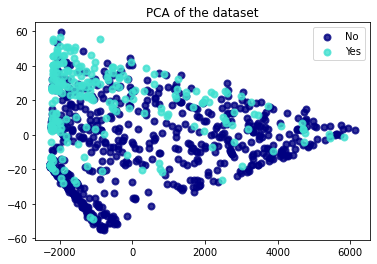

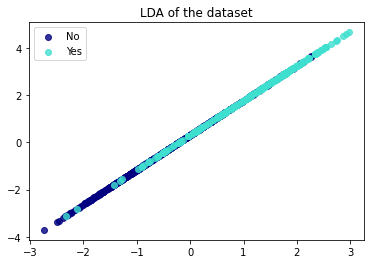

In [132]:
pca = PCA(n_components=2)
X_r = pca.fit(x_val_ord).transform(x_val_ord)

lda = LinearDiscriminantAnalysis()
X_r2 = lda.fit(x_val_ord, y_val_ord).transform(x_val_ord)

target_names = ['No','Yes']
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

print(lda.intercept_)
print(lda.coef_)

plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0.0, 1.0], target_names):
    plt.scatter(X_r[y_val_ord == i, 0], X_r[y_val_ord == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of the dataset')

plt.figure()
for color, i, target_name in zip(colors, [0.0, 1.0], target_names):
    plt.scatter(X_r2[y_val_ord == i,0], np.dot(lda.coef_, x_val_ord.loc[y_val_ord == i].T), alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of the dataset')

plt.show()

## Cross Validation

In [126]:
lda = LinearDiscriminantAnalysis()
lda.fit(ord_dataX, ord_dataY)
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=5)

grid = dict()
grid['solver']= ['svd','lsqr','eigen']

search = GridSearchCV(lda, grid, scoring='f1', cv=cv, n_jobs=-1)
results= search.fit(ord_dataX,ord_dataY)

print("F1 score: %.2f" %results.best_score_)
print("The best solver: %s" %results.best_params_)

F1 score: 0.57
The best solver: {'solver': 'svd'}


## QDA

In [127]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(ord_dataX, ord_dataY)
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=5)

grid=dict()
search = GridSearchCV(qda,grid, scoring='f1', cv=cv, n_jobs=-1)
results= search.fit(ord_dataX,ord_dataY)

print("F1 score: %.2f" %results.best_score_)
print("The best solver: %s" %results.best_params_)

F1 score: 0.62
The best solver: {}


# Ensemble Methods

## Voting Classifier

In [128]:
# Initializing voters
KNN_clf = KNeighborsClassifier()
DT_clf = DecisionTreeClassifier(random_state=0)
NB_clf = GaussianNB()

In [129]:
voting_clf = VotingClassifier(estimators=[("KNN", KNN_clf), ("DT", DT_clf),
                                          ("NB", NB_clf)])
voting_clf.fit(x_train_ord, y_train_ord)
y_pred = voting_clf.predict(x_test_ord)
print(classification_report(y_test_ord, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       440
         1.0       0.53      0.48      0.50       159

    accuracy                           0.75       599
   macro avg       0.67      0.66      0.67       599
weighted avg       0.74      0.75      0.74       599



## AdaBoost

In [130]:
model = AdaBoostClassifier(random_state=0)
model.fit(x_train_ord, y_train_ord)

y_pred = model.predict(x_test_ord)
print(classification_report(y_test_ord, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       440
         1.0       0.66      0.53      0.59       159

    accuracy                           0.80       599
   macro avg       0.75      0.72      0.73       599
weighted avg       0.79      0.80      0.80       599



## Bagging Classifier

In [131]:
bagging_clf = BaggingClassifier(n_estimators=15, random_state=0)
bagging_clf.fit(x_train_ord, y_train_ord)

y_pred = bagging_clf.predict(x_test_ord)
print(classification_report(y_test_ord, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       440
         1.0       0.58      0.41      0.48       159

    accuracy                           0.76       599
   macro avg       0.69      0.65      0.66       599
weighted avg       0.75      0.76      0.75       599

